Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("cardataset/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
len(df)

11914

Lowercasing and replacing ' ' with '_' in column name

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Lowercasing and replacing the values of column ' ' with '_'

In [5]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for i in string_columns:
    df[i] = df[i].str.lower().str.replace(' ','_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrp'>

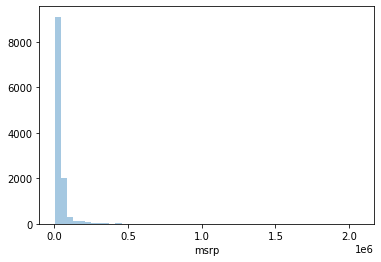

In [7]:
sns.distplot(df.msrp,kde=False)

<AxesSubplot:xlabel='msrp'>

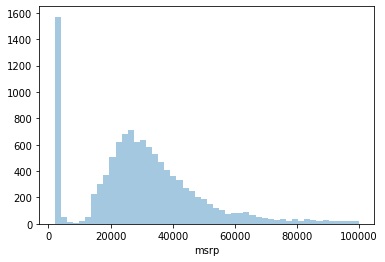

In [8]:
sns.distplot(df.msrp[df.msrp < 100000],kde=False)

Due to the long tail graph it can badly effect the model, thus applying log to remove the undesired effecton model

In [9]:
log_price = np.log1p(df.msrp)  # applying log(1+p) because our y may have zero values and log(0) gives -infinite
log_price

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp'>

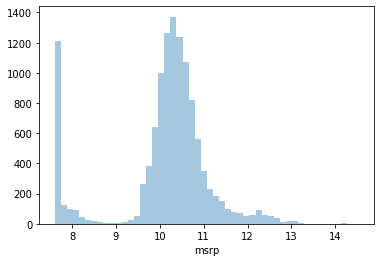

In [10]:
sns.distplot(log_price,kde=False)

If we have the normal distribution, linear regression performs well

checking for missing values

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Note that our target variable (msrp in this case) must not have any mising values otherwise that data will not be useful to us

dividing datasets in training,validation and test datasets

In [12]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - (n_val + n_test)

Now we need to shuffle the data thus using, `np.random.shuffle`, we have also divided the X into train, validation and test datasets

In [13]:
np.random.seed(2) # fixing the seed for reproducibility
index = np.arange(n)
np.random.shuffle(index)
df_shuffled = df.iloc[index]
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train+n_val:n_train+n_val+n_test]

Dividing y into train, validation and test datasets

In [14]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [15]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Training model using NumPy (Linear regression)

In [17]:
def linear_regression(X,y):
    # adding dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [18]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [19]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Now as we have missing values in some rows, one way is to drop the entire rows but the disadvantage is that we will lose the data. The simplest way is to fill the rows with 0

Now we can see that there are no empty rows in our dataframe, thus converting the dataframe to a matrix

In [20]:
X_train = prepare_X(df_train)

predicting the price

In [21]:
w0, w = linear_regression(X_train,y_train)
y_pred  = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

Plotting the graphs

<AxesSubplot:ylabel='Count'>

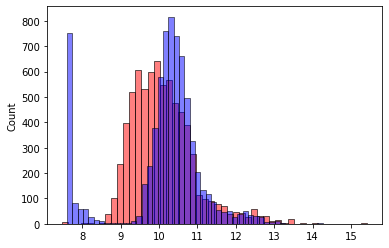

In [22]:
sns.histplot(y_pred, alpha=0.5, color='red', bins=50)
sns.histplot(y_train, alpha=0.5, color='blue', bins=50)

Calculating the RMSE of our model using NumPy

In [23]:
def rmse(y_pred,y):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

rmse(y_pred,y_train)  # Lower the RMSE, better the model

0.7554192603920132

Creating X_val matrix for validating the model

In [24]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation: ', rmse(y_pred,y_val))

validation:  0.7616530991301627


*FEATURE ENGINEERING*

In [25]:
df_train.year.max()

2017

In [26]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [27]:
X_train = prepare_X(df_train) 
w_0, w = linear_regression(X_train, y_train) 
X_val = prepare_X(df_val) 
y_pred = w_0 + X_val.dot(w) 
print('validation:', rmse(y_val, y_pred)) 

validation: 0.5172055461058327


We can see that the rmse value has decreased

<AxesSubplot:ylabel='Count'>

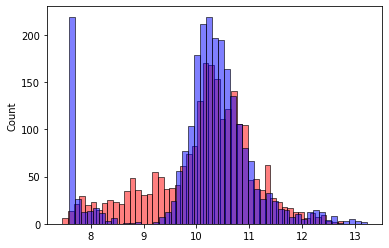

In [28]:
sns.histplot(y_pred, alpha=0.5, color='red', bins=50)
sns.histplot(y_val, alpha=0.5, color='blue', bins=50)

CATEGORICAL FEATURES

In [29]:
# For the number of doors

def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [30]:
# Training the model on a new categorical feature

X_train = prepare_X(df_train)
w0 , w = linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5157995641502257


The RMSE has decreased but not significantly

In [31]:
# using another categorical feature

df.make.value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [32]:
make = ['chevrolet','ford','volkswagen','toyota','dodge']

In [33]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    for m in make:
        df['make_%s' %m] = (df.make == m).astype('int')
        features.append('make_%s' %m)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [34]:
# Training the model on a new categorical feature

X_train = prepare_X(df_train)
w0 , w = linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5076038849557561


In [35]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


The RMSE score has been improved. Thus trying with other categorical variables

In [36]:
df.market_category.value_counts().head(6)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
performance            601
Name: market_category, dtype: int64

In [37]:
fuel_type = ['regular_unleaded','premium_unleaded_(required)','premium_unleaded_(recommended)','flex-fuel_(unleaded/e85)']
transmission = ['automatic','manual','automated_manual']
driven_wheels=['front_wheel_drive','rear_wheel_drive','all_wheel_drive','four_wheel_drive']
market_category = ['crossover','flex_fuel','luxury','luxury,performance','hatchback']
vehicle_size = ['compact','midsize','large']
vehicle_style = ['sedan','4dr_suv','coupe','convertible','4dr_hatchback']

In [38]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    for m in make:
        df['make_%s' %m] = (df.make == m).astype('int')
        features.append('make_%s' %m)

    for e in fuel_type:
        df['engine_fuel_type_%s' %e] = (df.engine_fuel_type == e).astype('int')
        features.append('engine_fuel_type_%s' %e)

    for v in transmission:
        df['transmission_%s' %v] = (df.transmission_type == v).astype('int')
        features.append('transmission_%s' %v)

    for v in driven_wheels:
        df['driven_wheels_%s' %v] = (df.driven_wheels == v).astype('int')
        features.append('driven_wheels_%s' %v)

    for v in market_category:
        df['mc_%s' %v] = (df.market_category == v).astype('int')
        features.append('mc_%s' %v)

    for v in vehicle_size:
        df['vehicle_size_%s' %v] = (df.vehicle_size == v).astype('int')
        features.append('vehicle_size_%s' %v) 

    for v in vehicle_style:
        df['vehicle_style_%s' %v] = (df.vehicle_style == v).astype('int')
        features.append('vehicle_style_%s' %v) 

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [39]:
# linear regression function

def linear_regression(X,y):
    # adding dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [40]:
X_train = prepare_X(df_train)
w0, w = linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print("validation: ", rmse(y_pred,y_val))

validation:  31.462484824010314


We can see that the RMSE value is suddenly too high even after including the categorical features. The reason behind this is numerical instability and this can be solved by adding a small number to its diagonal elements

In [41]:
# linear regression function

def linear_regression_reg(X,y,r):
    # adding dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)

    reg = 0.01
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [42]:
X_train = prepare_X(df_train)
w0, w = linear_regression_reg(X_train,y_train,r=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print("validation: ", rmse(y_pred,y_val))

validation:  0.46022676305560856


Checking for the best value of regularization factor   `reg`

In [43]:
for r in [0.0,0.00001,0.0001,0.001,0.01,0.1,1,10]:
    X_train = prepare_X(df_train)
    w0, w = linear_regression_reg(X_train,y_train,r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    # print("validation: ", rmse(y_pred,y_val))
    print(r, w0, rmse(y_pred,y_val))

0.0 -577834011065979.6 31.462484824010314
1e-05 14.528656245628637 0.46022532289023266
0.0001 7.253145227275491 0.4602254889706531
0.001 7.195336652866064 0.46022676305560856
0.01 7.181692237978398 0.46023949637173933
0.1 7.054109236653175 0.4603700695819672
1 6.219919390421125 0.4618298042652436
10 4.389924340527053 0.47572481006944234


From the above results we can say that either 0.001 or 0.0001 both are good to go
Thus choosing r = 0.001

In [44]:
# linear regression function

def linear_regression_reg(X,y,r):
    # adding dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)

    reg = 0.01
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [45]:
X_train = prepare_X(df_train)
w0, w = linear_regression_reg(X_train,y_train,r=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print("validation: ", rmse(y_pred,y_val))

validation:  0.46022676305560856


<AxesSubplot:ylabel='Count'>

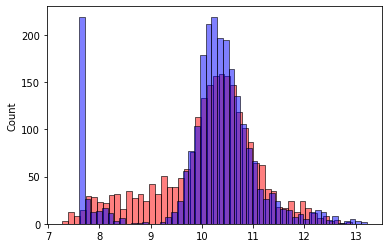

In [46]:
sns.histplot(y_pred, alpha=0.5, color='red', bins=50)
sns.histplot(y_val, alpha=0.5, color='blue', bins=50)

Now we will be training our model completely on train + validation dataset and test it on test dataset

In [47]:
df_full_train = pd.concat([df_train,df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [48]:
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train,y_val])

X_full_train,y_full_train

(array([[148.,   4.,  33., ...,   1.,   0.,   0.],
        [132.,   4.,  32., ...,   0.,   0.,   1.],
        [148.,   4.,  37., ...,   0.,   0.,   1.],
        ...,
        [332.,   8.,  23., ...,   0.,   0.,   0.],
        [148.,   4.,  34., ...,   0.,   0.,   0.],
        [290.,   6.,  25., ...,   0.,   0.,   0.]]),
 array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
         9.77542688, 10.1924563 ]))

In [49]:
# Training model on full training dataset

w0, w = linear_regression_reg(X_full_train,y_full_train,0.001)

In [50]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
print("validation: ", rmse(y_pred,y_test))

validation:  0.4561530617386308


In [51]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

USING THE MODEL

In [52]:
df_small = pd.DataFrame([car])

In [53]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
price = np.expm1(y_pred)
price

array([33836.54054633])

In [54]:
actual_p = np.expm1(y_test[20])
actual_p

35000.00000000001

We can see that the difference is not so large, thus our model is working good